# Recreating TCAV results

This is the code used to attempt to recreate the results in Been Kim's paper.

Experiments are run with 120 images of zebras using the concepts striped, dotted and zigzagged.

In [1]:
import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
import tcav.tcav as tcav
import tcav.utils as utils
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
import os 
import tensorflow as tf

In [ ]:

working_dir = os.getcwd() # "/Users/sebastianbitsch/Downloads/tcav-master/"

# where activations are stored (only if your act_gen_wrapper does so)
activation_dir =  working_dir+ '/activations/'

cav_dir = working_dir + '/cavs/'

source_dir = '/Users/sebastianbitsch/Downloads/tcav-master/tcav/tcav_examples/image_models/imagenet/data'
bottlenecks = ['mixed3a','mixed3b','mixed4a','mixed4b','mixed4c','mixed4d','mixed4e','mixed5a','mixed5b']  # @param 
      
utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(working_dir)
utils.make_dir_if_not_exists(cav_dir)

# this is a regularizer penalty parameter for linear classifier to get CAVs. 
alphas = [0.1]

target = 'zebra'
concepts = ["dotted","striped","zigzagged"]


In [3]:
# Create TensorFlow session.
sess = utils.create_session()

GRAPH_PATH = "tensorflow_inception_graph.pb"
LABEL_PATH = "imagenet_comp_graph_label_strings.txt"

mymodel = model.GoogleNetWrapper_public(sess, GRAPH_PATH, LABEL_PATH)

In [4]:
act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=120)

In [5]:
import absl
absl.logging.set_verbosity(0)
num_random_exp = 5

mytcav = tcav.TCAV(sess, target,
                   concepts, bottlenecks,
                   act_generator, alphas,
                   cav_dir=cav_dir,
                   num_random_exp=num_random_exp)

print ('This may take a while... Go get coffee!')

results = mytcav.run(run_parallel=False)

print ('done!')

INFO:tensorflow:mixed3a ['dotted', 'random500_0'] zebra 0.1
INFO:tensorflow:mixed3a ['dotted', 'random500_1'] zebra 0.1
INFO:tensorflow:mixed3a ['dotted', 'random500_2'] zebra 0.1
INFO:tensorflow:mixed3a ['dotted', 'random500_3'] zebra 0.1
INFO:tensorflow:mixed3a ['dotted', 'random500_4'] zebra 0.1
INFO:tensorflow:mixed3a ['striped', 'random500_0'] zebra 0.1
INFO:tensorflow:mixed3a ['striped', 'random500_1'] zebra 0.1
INFO:tensorflow:mixed3a ['striped', 'random500_2'] zebra 0.1
INFO:tensorflow:mixed3a ['striped', 'random500_3'] zebra 0.1
INFO:tensorflow:mixed3a ['striped', 'random500_4'] zebra 0.1
INFO:tensorflow:mixed3a ['zigzagged', 'random500_0'] zebra 0.1
INFO:tensorflow:mixed3a ['zigzagged', 'random500_1'] zebra 0.1
INFO:tensorflow:mixed3a ['zigzagged', 'random500_2'] zebra 0.1
INFO:tensorflow:mixed3a ['zigzagged', 'random500_3'] zebra 0.1
INFO:tensorflow:mixed3a ['zigzagged', 'random500_4'] zebra 0.1
INFO:tensorflow:mixed3a ['random500_0', 'random500_1'] zebra 0.1
INFO:tensorflow

2022-12-06 11:29:09.930032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


INFO:tensorflow:/Users/sebastianbitsch/Downloads/tcav-master//activations/acts_dotted_mixed3a does not exist, Making one...
INFO:tensorflow:/Users/sebastianbitsch/Downloads/tcav-master//activations/acts_random500_0_mixed3a does not exist, Making one...
INFO:tensorflow:/Users/sebastianbitsch/Downloads/tcav-master//activations/acts_zebra_mixed3a does not exist, Making one...
INFO:tensorflow:Training CAV ['dotted', 'random500_0'] - mixed3a alpha 0.1
INFO:tensorflow:training with alpha=0.1
INFO:tensorflow:acc per class {'dotted': 0.975, 'random500_0': 1.0, 'overall': 0.9875}
INFO:tensorflow:CAV accuracies: {'dotted': 0.975, 'random500_0': 1.0, 'overall': 0.9875}
INFO:tensorflow:Running param 1 of 315
INFO:tensorflow:running zebra ['dotted', 'random500_1']
INFO:tensorflow:Loaded /Users/sebastianbitsch/Downloads/tcav-master//activations/acts_dotted_mixed3a shape (120, 28, 28, 256)
INFO:tensorflow:/Users/sebastianbitsch/Downloads/tcav-master//activations/acts_random500_1_mixed3a does not exis

# Plot results

Class = zebra
  Concept = dotted
    Bottleneck = mixed3a. TCAV Score = 0.44 (+- 0.06), random was 0.50 (+- 0.10). p-val = 0.198 (not significant)
    Bottleneck = mixed3b. TCAV Score = 0.37 (+- 0.05), random was 0.49 (+- 0.11). p-val = 0.026 (significant)
    Bottleneck = mixed4a. TCAV Score = 0.17 (+- 0.06), random was 0.51 (+- 0.19). p-val = 0.001 (significant)
    Bottleneck = mixed4b. TCAV Score = 0.19 (+- 0.08), random was 0.49 (+- 0.11). p-val = 0.000 (significant)
    Bottleneck = mixed4c. TCAV Score = 0.31 (+- 0.17), random was 0.49 (+- 0.22). p-val = 0.114 (not significant)
    Bottleneck = mixed4d. TCAV Score = 0.46 (+- 0.14), random was 0.53 (+- 0.17). p-val = 0.461 (not significant)
    Bottleneck = mixed4e. TCAV Score = 0.43 (+- 0.25), random was 0.51 (+- 0.25). p-val = 0.569 (not significant)
    Bottleneck = mixed5a. TCAV Score = 0.34 (+- 0.29), random was 0.48 (+- 0.20). p-val = 0.216 (not significant)
    Bottleneck = mixed5b. TCAV Score = 0.07 (+- 0.10), random was 0

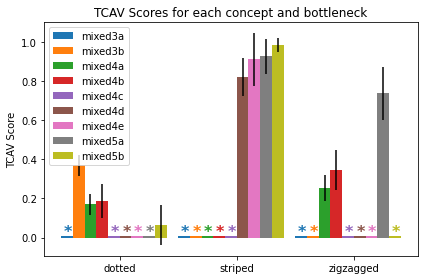

In [6]:
utils_plot.plot_results(results, num_random_exp=num_random_exp)

# Save results

In [8]:
import json
with open(f"results/results_superdata_120_5_20221206.json", "w") as outfile:
    json.dump(results, outfile)